<a href="https://colab.research.google.com/github/AnToxa0887/innopolis_2/blob/main/HW_10_A_B_TEST_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом задании необходимо использовать набор данных ad.csv.

1) Датасет содежит 2 столбца: объявление (A/B) и действие (0/1).

2) Вам необходимо сформулировать гипотезу, провести ее проверку (пользуясь классическим подходом) и ответить на вопрос какое из объявлений лучше.

1. Контекст задачи

Аналитики в сфере продаж компьютерных игр создали функцию приобретение игры через её онлайн представление (рекламный ролик) с последующим нажатием на кнопку покупки.  Текущая конверсия составляет 30 % покупок от общего числа просматривающих ролик, ожидаемый эффект 40%. Т.е. размещение ролика на сайте игровых консолей предполагает увеличение продаж и будет успешным, если оно превысит коэффициент конверсии до 40%



2. Формулировка гипотезы
Hо: p(a) = p(b)

H1: p(a) ≠ p(b)

где p(a) и p(b) означают соответственно коэффициент конверсии старого и нового вариантов размещения ролика. Мы также установим уровень доверия 95%, то есть α = 0,05

Значение α - это порог, который устанавливаем и делаем вывод: «Если вероятность наблюдения за результатом (p-значением) ниже α, то мы отвергаем гипотезу Hо». Поскольку наша α=0,05 (что указывает на вероятность 5%), наша уверенность (1 — α) составляет 95%.

В результате решения данной задачи, мы хотим быть на 95% уверены, что размещение ролика на сайте игровых консолей статистически отличается от коэффициента конверсии простого размещения рекламы, прежде чем отклонить нулевую гипотезу Ho.

3. Импортируем необходимые библиотеки для выполнения Д/з

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats   #для расчета статистических показателей
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ad.csv')
df.head()

,ad_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


Описание набора данных:
A - контрольная группа
B - тестовая группа

action:
0 - не было покупки
1 - была покупка

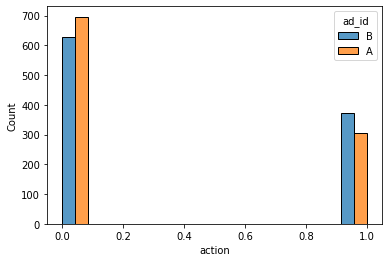

In [ ]:
sns.histplot(data=df, x="action", hue="ad_id", multiple="dodge") #гистограмма входных данных

Промежуточный вывод: Распределение данных состоит из двух значений 0 и 1

In [ ]:
summary_df = df.pivot_table(values='action', index = 'ad_id', aggfunc=np.sum) #для просмотра результата по сумме кликов по группам, можно использовать pivot_table


In [ ]:
summary_df

,action
ad_id,
A,304
B,372


Анонимные функции (lambda) могут содержать лишь одно выражение, но и выполняются они быстрее. Анонимные функции создаются с помощью конструкции lambda. Кроме этого, их не обязательно присваивать переменной

In [ ]:
def length(x):
    return len(x)

lambda_def = lambda x: len(x)
ll = [1,2,3]
print('Длина массива через def = ', length(ll))
print('Длина массива через lambda = ', lambda_def(ll))

Длина массива через def =  3
Длина массива через lambda =  3


In [ ]:
# добавим столбцы с расчетом кол-ва элементов по каждой группе и среднему (коэф-т конверсии)
summary_df['total_count'] = df.pivot_table(values='action', index='ad_id', aggfunc=lambda x: len(x))
summary_df['conversion_rate'] = df.pivot_table(values='action', index='ad_id') #по-умолчанию среднее

#Вычислим стандартное отклонение и ошибку(std / sqrt(n)) для каждой группы
summary_df['std_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: np.std(x, ddof=0))
summary_df['se_p'] = df.pivot_table(values='action', index='ad_id', aggfunc = lambda x: stats.sem(x, ddof=0))
summary_df

,action,total_count,conversion_rate,std_p,se_p
ad_id,,,,,
A,304,1000,0.304,0.459983,0.014546
B,372,1000,0.372,0.483338,0.015285


In [ ]:
Промежуточный вывод: Размещение ролика на сайте консолей B лучше, чем простое упоминание рекламы игры в роликах A (conversion_rate B > conversion_rate A)
Отрисуем данную пропорциональность на графике ниже

4. Визуализация промежуточных выводов

Text(0, 0.5, 'Коэф-т конверсии')

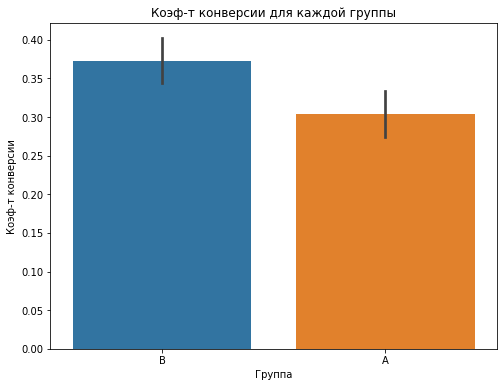

In [ ]:
plt.figure(figsize=(8,6))

sns.barplot(x=df['ad_id'], y=df['action'])

plt.title('Коэф-т конверсии для каждой группы')
plt.xlabel('Группа')
plt.ylabel('Коэф-т конверсии')

Промежуточные выводы: статистически ли значима данная разница?

5. Проверка гипотезы

Используем критерий Z-статистики для конверсии, который подходит для оценки конверсии, поскольку данные конверсии дискретные: пользователь либо совершил покупку, и мы присвоили ему 1, либо не совершил и мы присвоили ему 0.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint 
#добавляем библиотеку statsmodels.Мы импортируем из нее объект stats.proportion, который позволяет считать пропорции.

In [ ]:
#Выделяем явно группы: контрольная А, тестовая В
control_results = df[df['ad_id'] == 'A']['action']
test_results = df[df['ad_id'] == 'B']['action']

Статистический критерий вернет нам значение p-value, которое поможет оценить: есть ли статистическая значимость в разнице конверсий, которую показывает наш эксперимент.

Посчитаем p-value

Передаем функции proportions_ztest параметры:


1. Количество покупок в наших группах — значения колонки successes
2. Количество наблюдений — всех пользователей из колонки nobs

In [ ]:
#Считаем кол-во элементов в каждой группе
nobs = [control_results.count(), test_results.count()]

#Считаем кол-во покупок в каждой группе
successes = [control_results.sum(), test_results.sum()]

z_stat, pval = proportions_ztest(successes, nobs)

print('z statistic:', z_stat)
print('p-value:', pval)

z statistic: -3.2144492244084213
p-value: 0.0013069502732125403


Так как ни один статистический критерий не дает 100% уверенности, мы зададим ему порог 5% для ошибки первого рода — то есть согласимся, что 5% наших наблюдений будут ошибочными.

In [ ]:
alpha = 0.05

p-value — это фактическая вероятность попасть в ошибку первого рода на наших данных, если мы отклоним нулевую гипотезу. Давайте сравним p-value c желаемым уровнем точности нашего эксперимента.

Если p-value меньше порога ошибки первого рода — результат эксперимента можно считать статзначимым
Если p-value больше — мы будем вынуждены признать разницу в значениях тестовой и контрольной группы случайной

In [ ]:
print(pval < alpha)

True


Промежуточные выводы:

1. Тк p-value < 0.05, то отклоняем нулевую гипотезу, что означает - внедрение ролика на сайт работает иначе, чем старый метод
2. Если посмотрим на доверительные интервалы, то для нового режима В конверсия включает/не включает таргет и базовое значение коэф-та конверсии

Для расчета доверительных интервалов воспользуемся методом proportion_confint

In [ ]:
(lower_con, lower_test), (upper_con, upper_test) = proportion_confint(successes, nobs=nobs, alpha=alpha)

print('Доверительный интервал для контрольной группы A:', lower_con, ' - ', upper_con)
print('Доверительный интервал для тестовой группы B:', lower_test, ' - ', upper_test)

Доверительный интервал для контрольной группы A: 0.2754905064387712  -  0.3325094935612288
Доверительный интервал для тестовой группы B: 0.3420429266473629  -  0.4019570733526371


Промежуточные выводы:

В результате продвижение ролика на сайт консолей (B), можем ждать улучшений до 40% (подъем максимум на 10%) - данный метод повысит продажи игры.